In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import plotly.express as px

# M1 and M2 money supply timeseries

In [3]:

m1 = pd.read_csv('FRB_H6.csv',
                 usecols=[0,1,2],
                 skiprows=[0,1,2,3,4]
                 )
m1

,Time Period,M1_N.M,M2_N.M
0,1959-01,142.2,289.8
1,1959-02,139.3,287.7
2,1959-03,138.4,287.9
3,1959-04,139.7,290.2
4,1959-05,138.7,290.2
...,...,...,...
760,2022-05,20544.8,21555.1
761,2022-06,20547.1,21585.5
762,2022-07,20488.3,21578.9
763,2022-08,20400.0,21546.5


In [4]:
dates = m1['Time Period']

In [5]:
df_plot = m1[(m1["Time Period"] > '2007-01')]
df_plot = df_plot[["Time Period", "M1_N.M", "M2_N.M"]]

In [6]:
fig_m1 = px.line(df_plot , x = 'Time Period', y=['M1_N.M', 'M2_N.M'], title='USA M1 and M2 Indicators')

fig_m1.update_layout(
    title="USA M1 and M2 Indicators",
    xaxis_title="Time Period",
    yaxis_title="M1 and M2 (Billions of Dollars)",
    legend_title="Legend Title",
)

display(fig_m1)

# M2 vs Inflation comparison

In [7]:
# downloading inflation data from FRED
skip = range(11)

inflation = pd.read_csv('US inflation rates.csv', 
                        usecols=[0,13],
                        skiprows = [x for x in skip]
                        )
inflation

,Year,HALF1
0,2007,2.4
1,2008,2.3
2,2009,1.8
3,2010,1.1
4,2011,1.3
5,2012,2.2
6,2013,1.8
7,2014,1.8
8,2015,1.7
9,2016,2.2


In [8]:
# plot subplots of inflation and M2 using px.line
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1,
                    vertical_spacing=0.03)
fig.add_trace(go.Scatter(x=df_plot['Time Period'], y=df_plot['M2_N.M']), row=1, col=1)
fig.add_trace(go.Scatter(x=inflation['Year'], y=inflation['HALF1']), row=2, col=1)

# update x - axes properties
fig.update_xaxes(title_text="Year", row=2, col=1)

# update y - axes properties
fig.update_yaxes(title_text="M2 (Billions of Dollars)", row=1, col=1)
fig.update_yaxes(title_text="Inflation Rate (%)", row=2, col=1)

# update legend properties

# update title and size
fig.update_layout(height=600, width=800, title_text="M2 and Inflation", showlegend=False)


display(fig)


# Growth rate of M1 and M2 to determine high and low periods

In [9]:
m1.drop(columns=['Time Period'], inplace=True)

In [10]:
pct_diff = ((m1/m1.shift(1))-1)*100
pct_diff

,M1_N.M,M2_N.M
0,NaN,NaN
1,-2.039381,-0.724638
2,-0.646088,0.069517
3,0.939306,0.798889
4,-0.715820,0.000000
...,...,...
760,-1.321806,-1.345142
761,0.011195,0.141034
762,-0.286172,-0.030576
763,-0.430978,-0.150147


In [11]:
df_withDates = pct_diff.assign(Time_Period = dates)

In [12]:
df_plot = df_withDates[(df_withDates["Time_Period"] > '2007-01')]
df_plot = df_plot[["Time_Period", "M1_N.M", "M2_N.M"]]

In [13]:
fig_pct_diff = px.line(df_plot, x = 'Time_Period', y=['M1_N.M', 'M2_N.M'], title='USA M1 and M2 Indicators')

fig_pct_diff.update_layout(
    title="USA M1 and M2 Indicators",
    xaxis_title="Time Period",
    yaxis_title="Monthly growth rate (%)",
    legend_title="Indicator",
)

display(fig_pct_diff)

## Simple moving Average (SMA)

In [14]:
sma_period1 = 8
sma_period2 = 15
sma_period3 = 20
df_plot['sma_8_M1'] = df_plot['M1_N.M'].rolling(sma_period1).mean()
df_plot['sma_15_M1'] = df_plot['M1_N.M'].rolling(sma_period2).mean()
df_plot['sma_20_M1'] = df_plot['M1_N.M'].rolling(sma_period3).mean()
df_plot

,Time_Period,M1_N.M,M2_N.M,sma_8_M1,sma_15_M1,sma_20_M1
577,2007-02,-1.570489,0.162013,NaN,NaN,NaN
578,2007-03,2.293135,1.376992,NaN,NaN,NaN
579,2007-04,1.008416,1.233420,NaN,NaN,NaN
580,2007-05,-0.481218,-0.760639,NaN,NaN,NaN
581,2007-06,-1.068129,0.609032,NaN,NaN,NaN
...,...,...,...,...,...,...
760,2022-05,-1.321806,-1.345142,0.436594,0.792070,0.914564
761,2022-06,0.011195,0.141034,0.328977,0.625593,0.861234
762,2022-07,-0.286172,-0.030576,0.139429,0.476715,0.754295
763,2022-08,-0.430978,-0.150147,-0.114211,0.418572,0.645768


In [15]:
# Plotting SMA
fig_sma_m1 = px.line(df_plot, x = 'Time_Period', y=['M1_N.M', 'sma_8_M1', 'sma_15_M1', 'sma_20_M1'], title='SMA Indicators')

display(fig_sma_m1)

In [16]:
df_plot['sma_8_M2'] = df_plot['M2_N.M'].rolling(sma_period1).mean()
df_plot['sma_15_M2'] = df_plot['M2_N.M'].rolling(sma_period2).mean()
df_plot['sma_20_M2'] = df_plot['M2_N.M'].rolling(sma_period3).mean()
df_plot

,Time_Period,M1_N.M,M2_N.M,sma_8_M1,sma_15_M1,sma_20_M1,sma_8_M2,sma_15_M2,sma_20_M2
577,2007-02,-1.570489,0.162013,NaN,NaN,NaN,NaN,NaN,NaN
578,2007-03,2.293135,1.376992,NaN,NaN,NaN,NaN,NaN,NaN
579,2007-04,1.008416,1.233420,NaN,NaN,NaN,NaN,NaN,NaN
580,2007-05,-0.481218,-0.760639,NaN,NaN,NaN,NaN,NaN,NaN
581,2007-06,-1.068129,0.609032,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
760,2022-05,-1.321806,-1.345142,0.436594,0.792070,0.914564,0.371817,0.665673,0.758363
761,2022-06,0.011195,0.141034,0.328977,0.625593,0.861234,0.289895,0.530771,0.726047
762,2022-07,-0.286172,-0.030576,0.139429,0.476715,0.754295,0.145953,0.420441,0.646532
763,2022-08,-0.430978,-0.150147,-0.114211,0.418572,0.645768,-0.063762,0.394151,0.568637


In [17]:
# Plotting SMA
fig_sma_m2 = px.line(df_plot, x = 'Time_Period', y=['M2_N.M', 'sma_8_M2', 'sma_15_M2', 'sma_20_M2'], title='SMA Indicators')
display(fig_sma_m2)

## M1 high low periods

In [18]:
high_m1 = []
low_m1 = []


#add vertical line to sma_m1 graph
for i in range(len(df_plot)):
    if df_plot['sma_8_M1'].iloc[i] > df_plot['sma_15_M1'].iloc[i] and df_plot['sma_15_M1'].iloc[i] > df_plot['sma_20_M1'].iloc[i]:
        high_m1.append([df_plot['Time_Period'].iloc[i], 'High'])
    elif df_plot['sma_8_M1'].iloc[i]< df_plot['sma_15_M1'].iloc[i] and df_plot['sma_15_M1'].iloc[i] < df_plot['sma_20_M1'].iloc[i]:
        low_m1.append([df_plot['Time_Period'].iloc[i], 'Low'])


In [19]:
# identify the start and end points of the high and low periods
# combine the high and low periods into a single list denoted by 'periods'
high_low_m1 = high_m1 + low_m1
high_low_m1.sort()
df_high_low_m1 = pd.DataFrame(high_low_m1)
df_high_low_m1.columns = ['Time_Period', 'High_Low']
df_high_low_m1['Time_Period'] = pd.to_datetime(df_high_low_m1['Time_Period'])
df_high_low_m1['High_Low'] = df_high_low_m1['High_Low'].astype('category')

# cluster the high and low periods
df_high_low_m1['Cluster'] = df_high_low_m1['High_Low'].ne(df_high_low_m1['High_Low'].shift()).cumsum()
# take first and last date of each cluster
df_high_low_m1['First'] = df_high_low_m1.groupby('Cluster')['Time_Period'].transform('first')
df_high_low_m1['Last'] = df_high_low_m1.groupby('Cluster')['Time_Period'].transform('last')


# create seperate dataframes for high_low and firs and last dates
df_high_low_dates_m1 = df_high_low_m1[['High_Low','First', 'Last']]
df_high_low_dates_m1 = df_high_low_dates_m1.drop_duplicates()
df_high_low_dates_m1 = df_high_low_dates_m1.reset_index(drop=True)
df_high_low_dates_m1

,High_Low,First,Last
0,High,2008-09-01,2009-07-01
1,Low,2010-02-01,2010-07-01
2,High,2010-12-01,2012-02-01
3,Low,2012-05-01,2013-11-01
4,High,2014-05-01,2014-06-01
5,Low,2015-05-01,2016-01-01
6,High,2016-09-01,2017-08-01
7,Low,2017-09-01,2019-02-01
8,High,2019-09-01,2020-12-01
9,Low,2021-08-01,2022-09-01


In [20]:
#add vertical line to sma_m1 graph
for i in range(len(df_plot)):
    if df_plot['sma_8_M1'].iloc[i] > df_plot['sma_15_M1'].iloc[i] and df_plot['sma_15_M1'].iloc[i] > df_plot['sma_20_M1'].iloc[i]:
        fig_sma_m1.add_vline(x=df_plot['Time_Period'].iloc[i], line_width=0.5, line_dash="dash", line_color="green")
    elif df_plot['sma_8_M1'].iloc[i]< df_plot['sma_15_M1'].iloc[i] and df_plot['sma_15_M1'].iloc[i] < df_plot['sma_20_M1'].iloc[i]:
        fig_sma_m1.add_vline(x=df_plot['Time_Period'].iloc[i], line_width=0.5, line_dash="dash", line_color="red")

# add rectangles to the plot
for i in range(len(df_high_low_dates_m1)):
    if df_high_low_dates_m1['High_Low'].iloc[i] == 'High':
        fig_sma_m1.add_vrect(x0=df_high_low_dates_m1['First'].iloc[i], x1=df_high_low_dates_m1['Last'].iloc[i], fillcolor="green", opacity=0.2, line_width=1)
    elif df_high_low_dates_m1['High_Low'].iloc[i] == 'Low':
        fig_sma_m1.add_vrect(x0=df_high_low_dates_m1['First'].iloc[i], x1=df_high_low_dates_m1['Last'].iloc[i], fillcolor="red", opacity=0.2, line_width=1)

fig_sma_m1.update_layout(
    title="USA M1 Indicators",
    xaxis_title="Time Period",
    yaxis_title="Monthly growth rate (%)",
    legend_title="Legend",
)

display(fig_sma_m1)


## M2 high low periods

In [21]:
# identify points on df_plot where vertical lines are drawn on the plot (M2 periods)
high_m2 = []
low_m2 = []

for i in range(len(df_plot)):
    if df_plot['sma_8_M2'].iloc[i] > df_plot['sma_15_M2'].iloc[i] and df_plot['sma_15_M2'].iloc[i] > df_plot['sma_20_M2'].iloc[i]:
        high_m2.append([df_plot['Time_Period'].iloc[i], 'High'])
    elif df_plot['sma_8_M2'].iloc[i]< df_plot['sma_15_M2'].iloc[i] and df_plot['sma_15_M2'].iloc[i] < df_plot['sma_20_M2'].iloc[i]:
        low_m2.append([df_plot['Time_Period'].iloc[i], 'Low'])

In [22]:
# identify the start and end points of the high and low periods
# combine the high and low periods into a single list denoted by 'periods'
high_low_m2 = high_m2 + low_m2
high_low_m2.sort()
df_high_low_m2 = pd.DataFrame(high_low_m2)
df_high_low_m2.columns = ['Time_Period', 'High_Low']
df_high_low_m2['Time_Period'] = pd.to_datetime(df_high_low_m2['Time_Period'])
df_high_low_m2['High_Low'] = df_high_low_m2['High_Low'].astype('category')

# cluster the high and low periods
df_high_low_m2['Cluster'] = df_high_low_m2['High_Low'].ne(df_high_low_m2['High_Low'].shift()).cumsum()
# take first and last date of each cluster
df_high_low_m2['First'] = df_high_low_m2.groupby('Cluster')['Time_Period'].transform('first')
df_high_low_m2['Last'] = df_high_low_m2.groupby('Cluster')['Time_Period'].transform('last')


# create seperate dataframes for high_low and firs and last dates
df_high_low_dates_m2 = df_high_low_m2[['High_Low','First', 'Last']]
df_high_low_dates_m2 = df_high_low_dates_m2.drop_duplicates()
df_high_low_dates_m2 = df_high_low_dates_m2.reset_index(drop=True)
df_high_low_dates_m2

,High_Low,First,Last
0,High,2009-01-01,2009-05-01
1,Low,2009-09-01,2010-08-01
2,High,2010-12-01,2012-03-01
3,Low,2012-10-01,2013-07-01
4,High,2016-01-01,2016-02-01
5,Low,2017-02-01,2018-09-01
6,High,2019-04-01,2020-11-01
7,Low,2021-07-01,2022-09-01


In [23]:
#add vertical line to sma_m2 graph
for i in range(len(df_plot)):
    if df_plot['sma_8_M2'].iloc[i] > df_plot['sma_15_M2'].iloc[i] and df_plot['sma_15_M2'].iloc[i] > df_plot['sma_20_M2'].iloc[i]:
        fig_sma_m2.add_vline(x=df_plot['Time_Period'].iloc[i], line_width=0.5, line_dash="dash", line_color="green")
    elif df_plot['sma_8_M2'].iloc[i]< df_plot['sma_15_M2'].iloc[i] and df_plot['sma_15_M2'].iloc[i] < df_plot['sma_20_M2'].iloc[i]:
        fig_sma_m2.add_vline(x=df_plot['Time_Period'].iloc[i], line_width=0.5, line_dash="dash", line_color="red")


# add rectangles to the plot
for i in range(len(df_high_low_dates_m2)):
    if df_high_low_dates_m2['High_Low'].iloc[i] == 'High':
        fig_sma_m2.add_vrect(x0=df_high_low_dates_m2['First'].iloc[i], x1=df_high_low_dates_m2['Last'].iloc[i], fillcolor="green", opacity=0.2, line_width=1)
    elif df_high_low_dates_m2['High_Low'].iloc[i] == 'Low':
        fig_sma_m2.add_vrect(x0=df_high_low_dates_m2['First'].iloc[i], x1=df_high_low_dates_m2['Last'].iloc[i], fillcolor="red", opacity=0.2, line_width=1)

fig_sma_m2.update_layout(
    title="USA M2 Indicators",
    xaxis_title="Time Period",
    yaxis_title="Monthly growth rate (%)",
    legend_title="Legend",
)

## Inflation rate vs M2 periods

In [24]:
# change inflation year to time period of month and year
inflation['Time_Period'] = pd.to_datetime(inflation['Year'], format='%Y')
inflation


,Year,HALF1,Time_Period
0,2007,2.4,2007-01-01
1,2008,2.3,2008-01-01
2,2009,1.8,2009-01-01
3,2010,1.1,2010-01-01
4,2011,1.3,2011-01-01
5,2012,2.2,2012-01-01
6,2013,1.8,2013-01-01
7,2014,1.8,2014-01-01
8,2015,1.7,2015-01-01
9,2016,2.2,2016-01-01


In [25]:
fig_inflation = px.line(inflation, x = 'Time_Period', y = 'HALF1', title = 'Inflation Rate')

for i in range(len(df_plot)):
    if df_plot['sma_8_M2'].iloc[i] > df_plot['sma_15_M2'].iloc[i] and df_plot['sma_15_M2'].iloc[i] > df_plot['sma_20_M2'].iloc[i]:
        fig_inflation.add_vline(x=df_plot['Time_Period'].iloc[i], line_width=0.5, line_dash="dash", line_color="green")
    elif df_plot['sma_8_M2'].iloc[i]< df_plot['sma_15_M2'].iloc[i] and df_plot['sma_15_M2'].iloc[i] < df_plot['sma_20_M2'].iloc[i]:
        fig_inflation.add_vline(x=df_plot['Time_Period'].iloc[i], line_width=0.5, line_dash="dash", line_color="red")


# add rectangles to the plot
for i in range(len(df_high_low_dates_m2)):
    if df_high_low_dates_m2['High_Low'].iloc[i] == 'High':
        fig_inflation.add_vrect(x0=df_high_low_dates_m2['First'].iloc[i], x1=df_high_low_dates_m2['Last'].iloc[i], fillcolor="green", opacity=0.2, line_width=1)
    elif df_high_low_dates_m2['High_Low'].iloc[i] == 'Low':
        fig_inflation.add_vrect(x0=df_high_low_dates_m2['First'].iloc[i], x1=df_high_low_dates_m2['Last'].iloc[i], fillcolor="red", opacity=0.2, line_width=1)

fig_inflation.update_layout(
    title="USA Inlfation rate",
    xaxis_title="Time Period",
    yaxis_title="Inflation rate (%)",
    legend_title="Legend",
)


In [26]:
fig_inflation = px.line(inflation, x = 'Time_Period', y = 'HALF1', title = 'Inflation Rate')

for i in range(len(df_plot)):
    if df_plot['sma_8_M1'].iloc[i] > df_plot['sma_15_M1'].iloc[i] and df_plot['sma_15_M1'].iloc[i] > df_plot['sma_20_M1'].iloc[i]:
        fig_inflation.add_vline(x=df_plot['Time_Period'].iloc[i], line_width=0.5, line_dash="dash", line_color="green")
    elif df_plot['sma_8_M1'].iloc[i]< df_plot['sma_15_M1'].iloc[i] and df_plot['sma_15_M1'].iloc[i] < df_plot['sma_20_M1'].iloc[i]:
        fig_inflation.add_vline(x=df_plot['Time_Period'].iloc[i], line_width=0.5, line_dash="dash", line_color="red")

# add rectangles to the plot
for i in range(len(df_high_low_dates_m1)):
    if df_high_low_dates_m1['High_Low'].iloc[i] == 'High':
        fig_inflation.add_vrect(x0=df_high_low_dates_m1['First'].iloc[i], x1=df_high_low_dates_m1['Last'].iloc[i], fillcolor="green", opacity=0.2, line_width=1)
    elif df_high_low_dates_m1['High_Low'].iloc[i] == 'Low':
        fig_inflation.add_vrect(x0=df_high_low_dates_m1['First'].iloc[i], x1=df_high_low_dates_m1['Last'].iloc[i], fillcolor="red", opacity=0.2, line_width=1)

fig_inflation.update_layout(
    title="USA Inlfation rate",
    xaxis_title="Time Period",
    yaxis_title="Inflation rate (%)",
    legend_title="Legend",
)

# Task 2: PCA

In [27]:
#tickers = pd.read_html(
 #   'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
#print(tickers.Symbol)

In [28]:
# how to select random stock from yfinance library with no duplicates

#import random
#tiker_list = tickers.Symbol.to_list()
#companies= random.sample(tiker_list, 20)
#companies

In [29]:
companies = ['AVGO',
 'NDSN',
 'ETR',
 'HST',
 'MA',
 'WEC',
 'COF',
 'HRL',
 'NEE',
 'ESS',
 'ANSS',
 'NI',
 'TFX',
 'REGN',
 'IEX',
 'AKAM',
 'OXY',
 'CVS',
 'LLY',
 'SBNY']

In [30]:
# download close price data from yahoo finance on 20 shares from 2008-01 to 2022-09
STOCK_LIST = []
#VOLUME_LIST = []

for company in companies:
    ticker = yf.Ticker(company)
    stock_df = ticker.history(start="2007-01-01", end="2022-09-01", interval="1d")
    STOCK_LIST.append(stock_df['Close'])
    #VOLUME_LIST.append(stock_df['Volume'])


# create a dataframe with all the stocks
df = pd.concat(STOCK_LIST, axis=1)
df.columns = companies
#df_volume = pd.concat(VOLUME_LIST, axis=1)
#df_volume.columns = [company + '_Volume' for company in companies]
#df = pd.concat([df, df_volume], axis=1)
df = df.assign(Date = df.index)
df = df.reset_index(drop=True)
df = df[['Date'] + companies]
df.head(5)

,Date,AVGO,NDSN,ETR,HST,MA,WEC,COF,HRL,NEE,...,ANSS,NI,TFX,REGN,IEX,AKAM,OXY,CVS,LLY,SBNY
0,2007-01-03 00:00:00-05:00,NaN,21.124041,48.173317,15.267478,8.927979,14.623375,59.735222,7.006622,8.636708,...,22.094999,5.116386,52.878380,19.809999,24.877768,52.070000,28.406132,23.060537,30.842382,28.881334
1,2007-01-04 00:00:00-05:00,NaN,21.199366,48.743214,15.230181,9.366003,14.626427,59.665623,6.947853,8.630437,...,22.075001,5.097413,52.411549,20.180000,24.678146,53.299999,27.822432,23.180174,30.907320,29.067783
2,2007-01-05 00:00:00-05:00,NaN,20.843676,47.541203,14.900711,9.358590,14.324379,59.665623,6.901934,8.516010,...,22.000000,4.968817,52.516197,20.799999,24.221151,53.189999,27.633959,23.307295,30.718418,28.126205
3,2007-01-08 00:00:00-05:00,NaN,20.697208,47.183727,14.850986,9.360441,14.193178,59.874428,6.870716,8.505036,...,22.160000,4.960383,52.443760,21.150000,24.268427,53.009998,27.560987,23.441881,30.576750,28.275364
4,2007-01-09 00:00:00-05:00,NaN,20.672104,47.152626,15.031259,9.791979,14.150467,59.255821,6.817453,8.512876,...,21.764999,4.975141,52.797882,21.270000,24.457535,52.669998,26.545618,23.187654,30.594471,27.986366


In [31]:
len(df)

3944

In [32]:
# calculating the rate of return on the stocks
rets = df.iloc[:, 1:21].pct_change().fillna(0)
rets

,AVGO,NDSN,ETR,HST,MA,WEC,COF,HRL,NEE,ESS,ANSS,NI,TFX,REGN,IEX,AKAM,OXY,CVS,LLY,SBNY
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.003566,0.011830,-0.002443,0.049062,0.000209,-0.001165,-0.008388,-0.000726,-0.001006,-0.000905,-0.003708,-0.008828,0.018677,-0.008024,0.023622,-0.020548,0.005188,0.002105,0.006456
2,0.000000,-0.016778,-0.024660,-0.021633,-0.000791,-0.020651,0.000000,-0.006609,-0.013258,-0.012392,-0.003398,-0.025228,0.001997,0.030723,-0.018518,-0.002064,-0.006774,0.005484,-0.006112,-0.032392
3,0.000000,-0.007027,-0.007519,-0.003337,0.000198,-0.009159,0.003500,-0.004523,-0.001289,-0.007999,0.007273,-0.001697,-0.001379,0.016827,0.001952,-0.003384,-0.002641,0.005774,-0.004612,0.005303
4,0.000000,-0.001213,-0.000659,0.012139,0.046102,-0.003009,-0.010332,-0.007752,0.000922,0.015415,-0.017825,0.002975,0.006752,0.005674,0.007792,-0.006414,-0.036841,-0.010845,0.000580,-0.010221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,0.036339,0.010300,0.000922,0.022995,0.014601,0.003306,0.029902,-0.000194,0.007665,0.011631,0.025916,-0.006787,0.020611,0.001676,0.009601,0.011977,-0.005740,0.008590,0.013391,0.021298
3940,-0.053206,-0.038965,-0.003434,-0.046524,-0.036876,-0.013463,-0.033785,-0.006998,-0.014879,-0.030825,-0.048277,-0.017898,-0.045075,-0.012620,-0.037478,-0.027370,-0.012487,-0.020460,-0.023457,-0.050878
3941,-0.012825,-0.004896,0.003866,-0.014803,-0.007862,0.003722,-0.023857,0.003915,-0.007018,-0.015975,-0.012386,0.005302,-0.009860,-0.005720,-0.003212,-0.002716,0.023249,0.002698,-0.017144,-0.017114
3942,-0.015150,-0.016013,-0.021603,-0.005565,-0.004676,-0.016258,-0.003451,-0.012090,-0.015169,-0.015088,-0.005455,-0.019776,0.004821,-0.007389,-0.010791,-0.000763,-0.043184,-0.015250,-0.010027,-0.008257


In [33]:
mu = rets.mean()
mu*100

AVGO    0.115085
NDSN    0.085685
ETR     0.033268
HST     0.047646
MA      0.114000
WEC     0.057815
COF     0.059158
HRL     0.058525
NEE     0.069405
ESS     0.052261
ANSS    0.081839
NI      0.056169
TFX     0.051892
REGN    0.124724
IEX     0.068323
AKAM    0.048765
OXY     0.066572
CVS     0.050680
LLY     0.070513
SBNY    0.074881
dtype: float64

In [34]:
#rets = pd.concat([rets, df_volume], axis=1).fillna(0)

In [35]:
# standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rets)
scaled_rets = scaler.transform(rets)
df_scaled_rets = pd.DataFrame(scaled_rets)
df_scaled_rets

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.056514,-0.038064,-0.022049,-0.015973,-0.053074,-0.044524,-0.019775,-0.044433,-0.045898,-0.025536,-0.040370,-0.036397,-0.029859,-0.044415,-0.039000,-0.018510,-0.022999,-0.030305,-0.043982,-0.030771
1,-0.056514,0.120341,0.762016,-0.097873,2.231072,-0.028453,-0.058722,-0.681235,-0.093916,-0.074694,-0.085019,-0.276691,-0.537853,0.620706,-0.497030,0.878136,-0.732894,0.279919,0.087344,0.234517
2,-0.056514,-0.783405,-1.656443,-0.741212,-0.089922,-1.634878,-0.019775,-0.546203,-0.922679,-0.631030,-0.207968,-1.671105,0.085031,1.049672,-1.096054,-0.096848,-0.257028,0.297625,-0.425204,-1.361901
3,-0.056514,-0.350220,-0.520403,-0.127849,-0.043866,-0.749894,0.097206,-0.387831,-0.131114,-0.416371,0.318385,-0.146382,-0.109227,0.554806,0.072414,-0.146964,-0.114226,0.314990,-0.331640,0.187156
4,-0.056514,-0.091946,-0.065736,0.390979,2.093282,-0.276274,-0.365134,-0.632979,0.015055,0.727695,-0.919656,0.156391,0.358681,0.157634,0.405802,-0.261969,-1.295757,-0.678805,-0.007832,-0.450784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,1.727932,0.419503,0.039077,0.754922,0.626684,0.210069,0.979766,-0.059191,0.461016,0.542800,1.238024,-0.476205,1.156088,0.015253,0.509065,0.436124,-0.221307,0.483359,0.791275,0.844457
3940,-2.669231,-1.768991,-0.249668,-1.575690,-1.769884,-1.081305,-1.149109,-0.575757,-1.029821,-1.531723,-2.421807,-1.196142,-2.623512,-0.493826,-2.178299,-1.057410,-0.454380,-1.253765,-1.507110,-2.121527
3941,-0.686296,-0.255570,0.234208,-0.512233,-0.419120,0.242097,-0.817252,0.252824,-0.509978,-0.806135,-0.651381,0.307133,-0.597210,-0.248099,-0.222367,-0.121612,0.780212,0.131050,-1.113330,-0.734045
3942,-0.800484,-0.749398,-1.453804,-0.202533,-0.270765,-1.296567,-0.135146,-0.962356,-1.049015,-0.762795,-0.309447,-1.317839,0.247569,-0.307545,-0.654972,-0.047457,-1.514885,-0.942191,-0.669424,-0.370063


In [36]:
cov = df_scaled_rets.cov()
cov

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000254,0.375377,0.225632,0.264199,0.353102,0.153793,0.284093,0.184267,0.229691,0.230794,0.399642,0.242551,0.334656,0.230463,0.385251,0.249279,0.265083,0.241233,0.225312,0.295160
1,0.375377,1.000254,0.401596,0.560624,0.503157,0.334937,0.526813,0.300261,0.411933,0.502627,0.553132,0.436925,0.461500,0.343445,0.683892,0.429445,0.443575,0.392560,0.371068,0.475017
2,0.225632,0.401596,1.000254,0.375853,0.360980,0.715648,0.347037,0.356901,0.731850,0.470810,0.348308,0.710702,0.388085,0.206325,0.415531,0.253464,0.374207,0.362265,0.386290,0.292666
3,0.264199,0.560624,0.375853,1.000254,0.503093,0.305075,0.661963,0.251117,0.370176,0.725726,0.458414,0.443296,0.405668,0.322949,0.577339,0.375057,0.471320,0.395954,0.346506,0.561044
4,0.353102,0.503157,0.360980,0.503093,1.000254,0.317769,0.526230,0.252944,0.382949,0.467444,0.509122,0.397175,0.482949,0.315622,0.516027,0.416138,0.404445,0.369250,0.355184,0.430287
5,0.153793,0.334937,0.715648,0.305075,0.317769,1.000254,0.255887,0.418565,0.707499,0.444345,0.315022,0.698623,0.348397,0.233412,0.370656,0.249183,0.255078,0.338768,0.418778,0.223933
6,0.284093,0.526813,0.347037,0.661963,0.526230,0.255887,1.000254,0.214546,0.326719,0.580883,0.430126,0.402086,0.411304,0.275280,0.549878,0.335212,0.458922,0.381333,0.334327,0.600029
7,0.184267,0.300261,0.356901,0.251117,0.252944,0.418565,0.214546,1.000254,0.357490,0.280752,0.281129,0.390309,0.291064,0.219424,0.332541,0.261331,0.184619,0.319128,0.331413,0.205835
8,0.229691,0.411933,0.731850,0.370176,0.382949,0.707499,0.326719,0.357490,1.000254,0.458975,0.402850,0.657040,0.403409,0.246684,0.428218,0.272197,0.322427,0.365602,0.424852,0.280427
9,0.230794,0.502627,0.470810,0.725726,0.467444,0.444345,0.580883,0.280752,0.458975,1.000254,0.434195,0.510463,0.411638,0.311890,0.528564,0.330495,0.373440,0.380318,0.385819,0.478204


## Adequacy check

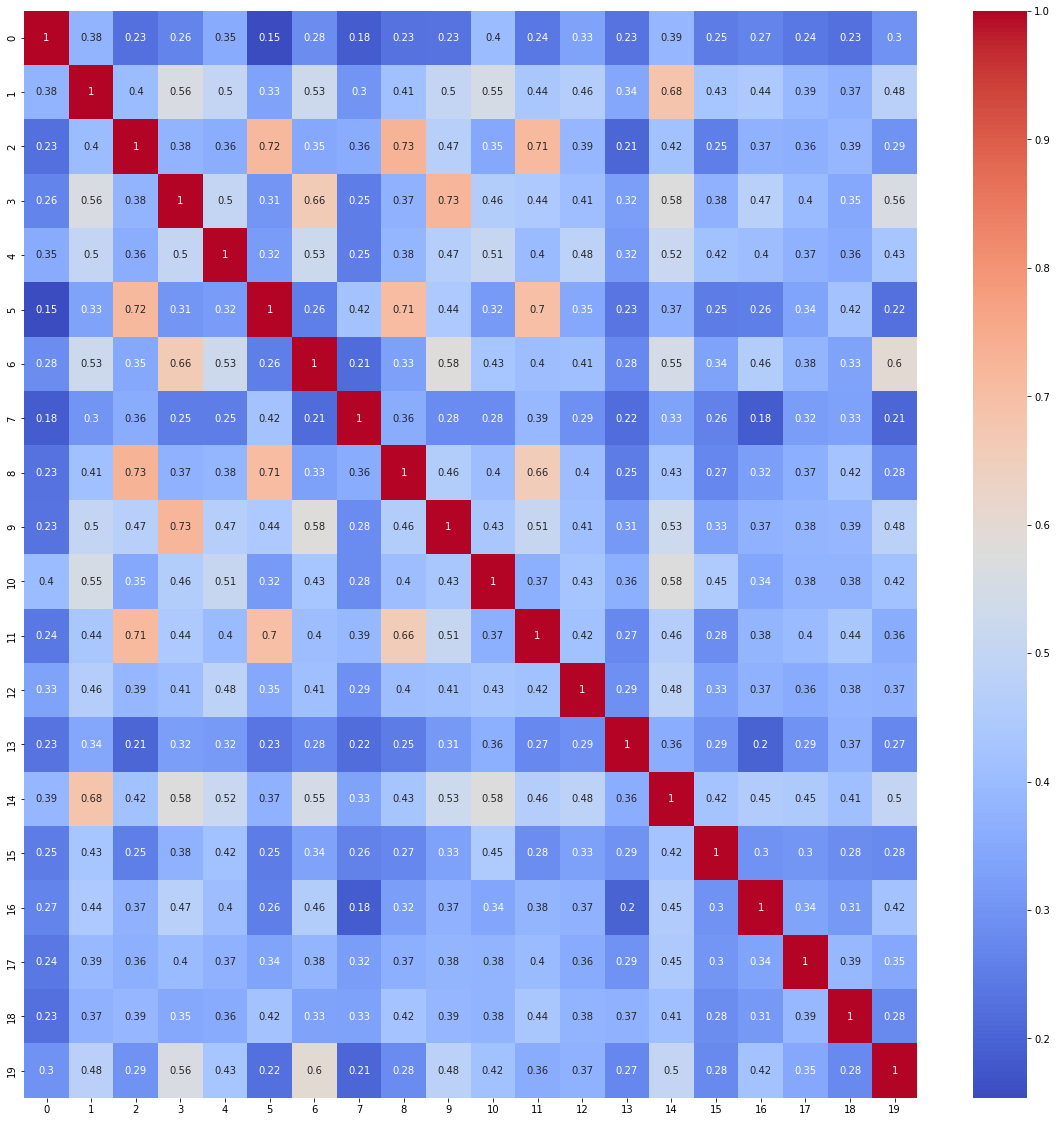

In [37]:
# plot the correlation matrix with labels and colorbar 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(cov, annot=True, cmap='coolwarm')
plt.show()

In [38]:
from numpy.linalg import eig

eigenvalues, eigenvectors = eig(cov)
sort_index = np.argsort(eigenvalues)[::-1]


In [39]:
# sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sort_index]


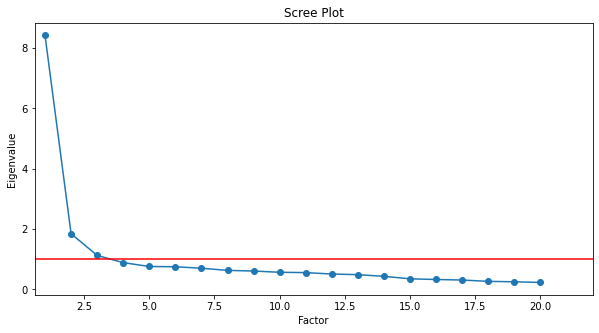

In [40]:
# plot horizonal line at 1 
xvals = range(1, rets.shape[1]+1)
plt.figure(figsize=(10, 5))
plt.scatter(xvals, sorted_eigenvalues)
plt.plot(xvals, sorted_eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.axhline(y=1, color='r', linestyle='-')
plt.margins(x=1.0)
plt.xlim(xmin=0.6, xmax=22)
plt.ylabel('Eigenvalue')
plt.show()

In [41]:
# find the number of factors
num_factors = np.argmax(sorted_eigenvalues < 1) + 1
if num_factors >= 10:
    num_factors = 10
elif num_factors <= 3:
    num_factors = 3

print('Number of factors: ', num_factors)

Number of factors:  4


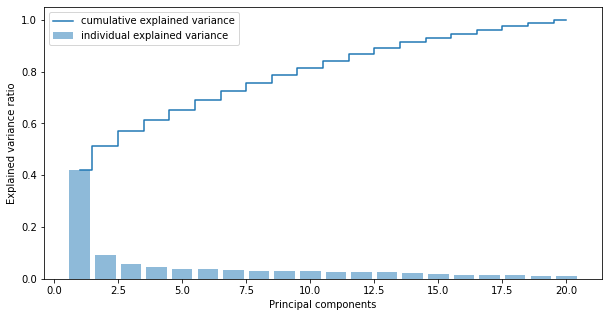

In [42]:
total_ev = sum(sorted_eigenvalues)
var_exp = [(i/total_ev) for i in sorted(sorted_eigenvalues, reverse=True)]
# plot the cumulative variance explained
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(10, 5))
plt.bar(range(1, rets.shape[1]+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, rets.shape[1]+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [43]:
# calclate the total variance explained by the factors
total_var_exp = sum(var_exp[:num_factors])
print('Total Variance Explained by ', num_factors, ' factors: ', total_var_exp)

Total Variance Explained by  4  factors:  0.6137306665785659


In [44]:
# Finding the principal components
factor_matrix = sorted_eigenvectors[:, :num_factors]
shifted = df_scaled_rets - df_scaled_rets.mean()
factor_returns = pd.DataFrame(np.dot(shifted, factor_matrix))
factor_returns.columns = ['Factor_' + str(i) for i in range(1, num_factors+1)]
factor_returns

,Factor_1,Factor_2,Factor_3,Factor_4
0,0.153232,-0.011150,-0.044187,-0.010259
1,-0.434278,-0.327013,0.445490,-0.182173
2,2.602391,-1.654096,1.373460,-0.784282
3,0.493285,-0.789149,0.291093,-0.258862
4,0.033045,-0.206504,-0.196211,-0.038180
...,...,...,...,...
3939,-2.307507,-1.187105,0.614745,0.775071
3940,6.449566,1.507346,-1.037507,-1.247638
3941,1.315106,0.863648,-0.182062,0.220926
3942,3.002021,-1.448367,0.162647,-0.391022


In [45]:
E = factor_returns.mean()
E

Factor_1    2.150635e-17
Factor_2   -6.924819e-18
Factor_3   -1.004943e-17
Factor_4    1.978218e-17
dtype: float64

In [46]:
# calculate the factor loadings
loadings = [(i*np.sqrt(sorted_eigenvalues[:num_factors])) for i in sorted_eigenvectors[:, :num_factors]]
factor_loadings = pd.DataFrame(loadings)
factor_loadings.columns = ['Factor_' + str(i) for i in range(1, num_factors+1)]
factor_loadings.index = rets.columns
factor_loadings

,Factor_1,Factor_2,Factor_3,Factor_4
AVGO,-0.461388,-0.224106,0.351001,0.542714
NDSN,-0.746193,-0.219138,0.052285,0.094626
ETR,-0.683311,0.532804,-0.149934,0.162036
HST,-0.740992,-0.275052,-0.331099,-0.178664
MA,-0.691692,-0.211832,0.056547,0.116140
WEC,-0.630931,0.630999,-0.038343,0.014880
COF,-0.701998,-0.329090,-0.327282,-0.075671
HRL,-0.482589,0.286359,0.287989,-0.173109
NEE,-0.686633,0.513075,-0.048158,0.125067
ESS,-0.736060,-0.052100,-0.319092,-0.204244


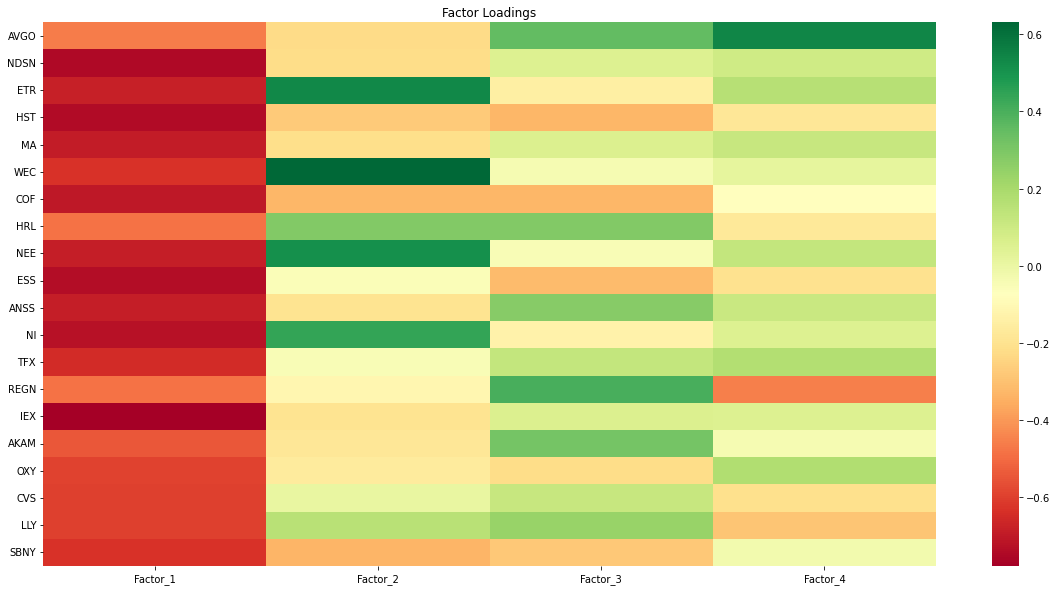

In [47]:
# present factor loadings in a heatmap
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(factor_loadings, cmap='RdYlGn', annot=False)
plt.title('Factor Loadings')
plt.show()

In [48]:
#choosing the companies with the highest factor loadings
factor_loadings['Factor_1'].sort_values(ascending=False).head(20)

AVGO   -0.461388
REGN   -0.480840
HRL    -0.482589
AKAM   -0.542354
OXY    -0.595604
LLY    -0.599221
CVS    -0.599695
WEC    -0.630931
SBNY   -0.632595
TFX    -0.648179
ETR    -0.683311
ANSS   -0.685439
NEE    -0.686633
MA     -0.691692
COF    -0.701998
NI     -0.725574
ESS    -0.736060
HST    -0.740992
NDSN   -0.746193
IEX    -0.777740
Name: Factor_1, dtype: float64

#### i) Economically meaningful quantity?

What is the economically meaningful factor? company size, foreign exposure etc?

### ii) Determining the portfolio with the highest return of all portfolios with a volatility of either 10%, 20% or 30%

In [49]:
scaler.fit(factor_returns)
scaled_pca = scaler.transform(factor_returns)
df_scaled_pca = pd.DataFrame(scaled_pca)
df_scaled_pca

,0,1,2,3
0,0.052809,-0.008209,-0.041673,-0.010897
1,-0.149668,-0.240770,0.420141,-0.193500
2,0.896883,-1.217863,1.295308,-0.833048
3,0.170005,-0.581027,0.274530,-0.274958
4,0.011388,-0.152043,-0.185047,-0.040554
...,...,...,...,...
3939,-0.795254,-0.874031,0.579764,0.823264
3940,2.222765,1.109815,-0.978471,-1.325216
3941,0.453235,0.635879,-0.171702,0.234663
3942,1.034610,-1.066391,0.153393,-0.415335


In [50]:
cov_pca = factor_returns.cov()
cov_pca

,Factor_1,Factor_2,Factor_3,Factor_4
Factor_1,8.421396e+00,-6.721594e-16,-1.160511e-15,4.721334e-16
Factor_2,-6.721594e-16,1.845163e+00,4.194238e-16,2.937318e-16
Factor_3,-1.160511e-15,4.194238e-16,1.124595e+00,7.544899e-16
Factor_4,4.721334e-16,2.937318e-16,7.544899e-16,8.865729e-01


In [51]:
daily_volatility = [x/252 for x in [0.1,0.2,0.3]]
daily_volatility

[0.0003968253968253968, 0.0007936507936507937, 0.0011904761904761904]

In [52]:
# Efficient Markowitz Frontier
from scipy.optimize import minimize

target_vol = daily_volatility
E = factor_returns.mean()
return_opt = []
weights = []

def minimize_Vol(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(cov_pca,w)))
    return V

def get_Return(w):
    w = np.array(w)
    R = np.sum(E*w)
    return R

def checkSumToOne(w):
    return np.sum(w)-1

w0 = np.ones(num_factors)/num_factors
bounds = tuple((0,1) for x in range(num_factors))

for vol in target_vol:
    #find the point with opt volatility
    constraints = ({'type':'eq', 'fun':checkSumToOne},
                   {'type':'eq', 'fun': lambda w: minimize_Vol(w) - vol})
    opt = minimize(get_Return, w0,method='SLSQP',bounds=bounds, constraints=constraints)
    
    #save optimal volatility values
    return_opt.append(opt['fun'])
    weights.append(opt['x'])

In [53]:
return_opt

[4.547626297263703e-18, 4.547626028346095e-18, 4.547626301366508e-18]

In [54]:
weights

[array([0.04434346, 0.20238534, 0.33206065, 0.42121055]),
 array([0.04434346, 0.20238535, 0.33206066, 0.42121054]),
 array([0.04434346, 0.20238534, 0.33206065, 0.42121055])]

The optimal factor portfolio consists of 6.68% Factor 1, 41.2% Factor 2 and 52.1% Factor 3.

### iii) Investing in those factors

I would then find the value of each stock by mutiplying the factor portfolio percentage by the loading of each factor on the stock. Taking the example of the first stock:

$$ ALB = returns(0.0668F_{1} + 0.4117F_{2}+ 0.5214F_{3})$$
$$ ALB = returns((0.0668)(0.7177) + (0.4117)(-0.1078)+ (0.5214)(0.1822))$$

In [55]:
portfolio = weights[0]
portfolio

# multiply the weights by the factor loadings to get the weights for the stocks
stock_weights = pd.DataFrame(portfolio*factor_loadings)

# sum the weights for each stock
stock_weights['Total'] = stock_weights.sum(axis=1)
stock_weights

,Factor_1,Factor_2,Factor_3,Factor_4,Total
AVGO,-0.020460,-0.045356,0.116553,0.228597,0.279335
NDSN,-0.033089,-0.044350,0.017362,0.039857,-0.020220
ETR,-0.030300,0.107832,-0.049787,0.068251,0.095996
HST,-0.032858,-0.055666,-0.109945,-0.075255,-0.273725
MA,-0.030672,-0.042872,0.018777,0.048919,-0.005847
WEC,-0.027978,0.127705,-0.012732,0.006267,0.093262
COF,-0.031129,-0.066603,-0.108678,-0.031873,-0.238283
HRL,-0.021400,0.057955,0.095630,-0.072915,0.059270
NEE,-0.030448,0.103839,-0.015991,0.052680,0.110079
ESS,-0.032639,-0.010544,-0.105958,-0.086030,-0.235171


The Total stock weight determined are the new $\beta$ value of each stock. Therefore to invest in the stock I could calculate the expected market return of each stock and choose the stocks with the highest returns. I would use the following equation:

$$EMR = R_{f} + \beta(E - R_{f})$$

Where, $R_{f}$ represents the return from a risk free asset (such as a government bond) and $E$ represents the average return of the stock. 

In [56]:
# US risk free asset data from FRED 
rf = pd.read_csv('United States 10-Year Bond Yield Historical Data.csv', usecols=['Date', 'Price'])
rf = rf.drop(rf.index[0])
#reverse the order of the data
rf = rf.iloc[::-1]
rf = rf.reset_index(drop=True)
rf = pd.DataFrame(rf)
rf



,Date,Price
0,"Jan 02, 2008",3.905
1,"Jan 03, 2008",3.894
2,"Jan 04, 2008",3.875
3,"Jan 07, 2008",3.837
4,"Jan 08, 2008",3.780
...,...,...
4222,"Aug 26, 2022",3.030
4223,"Aug 28, 2022",3.071
4224,"Aug 29, 2022",3.114
4225,"Aug 30, 2022",3.112


In [57]:
rf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4227 non-null   object 
 1   Price   4227 non-null   float64
dtypes: float64(1), object(1)
memory usage: 66.2+ KB


In [58]:
#change price to numeric
#rf['Price'] = pd.to_numeric(rf['Price'], errors='coerce')

# calculate mean returns of rf
rf['Price'] = rf['Price'].astype(float)
rf_rets = (rf['Price']/rf['Price'].shift(1))-1
rf_rets


0            NaN
1      -0.002817
2      -0.004879
3      -0.009806
4      -0.014855
          ...   
4222   -0.000330
4223    0.013531
4224    0.014002
4225   -0.000642
4226    0.026992
Name: Price, Length: 4227, dtype: float64

In [59]:
rf_mean = rf_rets.mean()

In [60]:
ERM = rf_mean + stock_weights['Total'] * (mu - rf_mean)
ERM

AVGO    0.000579
NDSN    0.000348
ETR     0.000356
HST     0.000326
MA      0.000353
WEC     0.000379
COF     0.000302
HRL     0.000371
NEE     0.000395
ESS     0.000319
ANSS    0.000389
NI      0.000365
TFX     0.000370
REGN    0.000265
IEX     0.000347
AKAM    0.000362
OXY     0.000340
CVS     0.000347
LLY     0.000344
SBNY    0.000280
dtype: float64

In [61]:
# ERM in descending order and heatmap
ERM = ERM.sort_values(ascending=False).head(5)
ERM


AVGO    0.000579
NEE     0.000395
ANSS    0.000389
WEC     0.000379
HRL     0.000371
dtype: float64

## (b) Comparing the performance of the factor portfolio to that of the different periods in Question 1

In [62]:
portfolio

array([0.04434346, 0.20238534, 0.33206065, 0.42121055])

In [63]:
# multiply factor returns by the weights to get the returns for the stocks
factor_performance = pd.DataFrame(portfolio*df_scaled_pca)
factor_performance.columns = ['Factor_' + str(i) for i in range(1, num_factors+1)]
factor_performance['Total'] = factor_performance.sum(axis=1)


# add time series to the dataframe
factor_performance['Date'] = df['Date']
factor_performance


,Factor_1,Factor_2,Factor_3,Factor_4,Total,Date
0,0.002342,-0.001661,-0.013838,-0.004590,-0.017748,2007-01-03 00:00:00-05:00
1,-0.006637,-0.048728,0.139512,-0.081504,0.002643,2007-01-04 00:00:00-05:00
2,0.039771,-0.246478,0.430121,-0.350888,-0.127474,2007-01-05 00:00:00-05:00
3,0.007539,-0.117591,0.091160,-0.115815,-0.134708,2007-01-08 00:00:00-05:00
4,0.000505,-0.030771,-0.061447,-0.017082,-0.108795,2007-01-09 00:00:00-05:00
...,...,...,...,...,...,...
3939,-0.035264,-0.176891,0.192517,0.346767,0.327129,2022-08-25 00:00:00-04:00
3940,0.098565,0.224610,-0.324912,-0.558195,-0.559931,2022-08-26 00:00:00-04:00
3941,0.020098,0.128693,-0.057016,0.098843,0.190618,2022-08-29 00:00:00-04:00
3942,0.045878,-0.215822,0.050936,-0.174944,-0.293952,2022-08-30 00:00:00-04:00


In [64]:
# plot total returns
factor_performance_plot = factor_performance[['Date', 'Total']]
# add cumulative returns
factor_performance_plot['Cumulative'] = factor_performance_plot['Total'].cumsum()
factor_performance_plot

C:\Users\RozinaLucy.Myoya\AppData\Local\Temp\6\ipykernel_21556\3107544637.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Total,Cumulative
0,2007-01-03 00:00:00-05:00,-0.017748,-1.774755e-02
1,2007-01-04 00:00:00-05:00,0.002643,-1.510468e-02
2,2007-01-05 00:00:00-05:00,-0.127474,-1.425791e-01
3,2007-01-08 00:00:00-05:00,-0.134708,-2.772866e-01
4,2007-01-09 00:00:00-05:00,-0.108795,-3.860814e-01
...,...,...,...
3939,2022-08-25 00:00:00-04:00,0.327129,7.393115e-01
3940,2022-08-26 00:00:00-04:00,-0.559931,1.793803e-01
3941,2022-08-29 00:00:00-04:00,0.190618,3.699980e-01
3942,2022-08-30 00:00:00-04:00,-0.293952,7.604639e-02


In [65]:
fig_factor = px.line(factor_performance_plot, x='Date', y=['Cumulative'], title='Factor Returns')
display(fig_factor)

In [66]:
# add vertical lines at high and low points
for i in range(len(high_m2)):
    fig_factor.add_vline(x=high_m2[i][0], line_width=1, line_dash="dash", line_color="green")
for i in range(len(low_m2)):
    fig_factor.add_vline(x=low_m2[i][0], line_width=1, line_dash="dash", line_color="red")

# add rectangles to the plot
for i in range(len(df_high_low_dates_m2)):
    if df_high_low_dates_m2['High_Low'].iloc[i] == 'High':
        fig_factor.add_vrect(x0=df_high_low_dates_m2['First'].iloc[i], x1=df_high_low_dates_m2['Last'].iloc[i], fillcolor="green", opacity=0.2, line_width=1)
    elif df_high_low_dates_m2['High_Low'].iloc[i] == 'Low':
        fig_factor.add_vrect(x0=df_high_low_dates_m2['First'].iloc[i], x1=df_high_low_dates_m2['Last'].iloc[i], fillcolor="red", opacity=0.2, line_width=1)
display(fig_factor)

### Checking if we would beat the market returns using our factor portfolio

In [67]:
sp500 = pd.read_csv('S&P 500 Historical Data.csv', usecols=['Date', 'Price'])
sp500 = sp500.drop(sp500.index[0])
#reverse the order of the data
sp500 = sp500.iloc[::-1]
sp500 = sp500.reset_index(drop=True)
sp500 = pd.DataFrame(sp500)

#change price to numeric
sp500['Price'] = sp500['Price'].str.replace(',', '')
sp500['Price'] = pd.to_numeric(sp500['Price'], errors='coerce')

#create a new column with the returns
sp500['Returns'] = (sp500['Price']/sp500['Price'].shift(1))-1
sp500.fillna(0, inplace=True)

# change the date to datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])

# add cumulative returns
sp500['Cumulative'] = sp500['Returns'].cumsum()
sp500

,Date,Price,Returns,Cumulative
0,2008-01-02,1447.16,0.000000,0.000000
1,2008-01-03,1447.16,0.000000,0.000000
2,2008-01-04,1411.63,-0.024552,-0.024552
3,2008-01-07,1416.18,0.003223,-0.021328
4,2008-01-08,1390.19,-0.018352,-0.039680
...,...,...,...,...
3693,2022-09-01,3966.85,0.002996,1.326608
3694,2022-09-02,3924.26,-0.010736,1.315871
3695,2022-09-06,3908.19,-0.004095,1.311776
3696,2022-09-07,3979.87,0.018341,1.330117


In [68]:
sp500_plot = px.line(sp500, x='Date', y=['Cumulative'], title='sp500 Returns')
display(sp500_plot)

In [69]:
# add sp500 cumulative returns to fig_factor
fig_factor.add_scatter(x=sp500['Date'], y=sp500['Cumulative'], mode='lines', name='S&P 500')
display(fig_factor)

## (c) Would it make a big difference to conduct PCA between the different high and low periods compared to taking the full period?

I want to say no, because the historical data used to conduct PCA within the identified time periods does not change and that means that the factors found within each period would be not change either?

In [70]:
df_high_low_dates_m2

,High_Low,First,Last
0,High,2009-01-01,2009-05-01
1,Low,2009-09-01,2010-08-01
2,High,2010-12-01,2012-03-01
3,Low,2012-10-01,2013-07-01
4,High,2016-01-01,2016-02-01
5,Low,2017-02-01,2018-09-01
6,High,2019-04-01,2020-11-01
7,Low,2021-07-01,2022-09-01


In [71]:
# conduct pca analysis for each high and low period and plot the results

#for i in range(len(df_high_low_dates_m2)):
    # get stock data for each high and low period
    start = pd.to_datetime(df_high_low_dates_m2['First'].iloc[i], utc=True).tz_convert('America/New_York')
    end = pd.to_datetime(df_high_low_dates_m2['Last'].iloc[i], utc=True).tz_convert('America/New_York')
    stock_df = df[(df['Date'] >= start) & (df['Date'] <= end)]
    stock_df

    # calculate returns
    stock_rets = stock_df.iloc[:,1:29].pct_change().fillna(0)
    

    # standardize the data
    scaler = StandardScaler()
    scaler.fit(stock_rets)
    scaled_rets = scaler.transform(stock_rets)
    df_scaled_rets = pd.DataFrame(scaled_rets, columns=stock_rets.columns)

    # calculate cov matriz and eigenvalues and eigenvectors
    cov = df_scaled_rets.cov()
    eigenvalues, eigenvectors = eig(cov)
    sort_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sort_index]

    # determine the number of factors
    num_factors = np.argmax(sorted_eigenvalues < 1) + 1
    if num_factors >= 10:
        num_factors = 10
    elif num_factors <= 3:
        num_factors = 3

    # Finding the principal components
    mu = stock_rets.mean()
    factor_matrix = sorted_eigenvectors[:, :num_factors]
    shifted = df_scaled_rets - df_scaled_rets.mean()
    factor_returns = pd.DataFrame(np.dot(shifted, factor_matrix))
    factor_returns.columns = ['Factor_' + str(i) for i in range(1, num_factors+1)]
    E = factor_returns.mean()

    # calculate factor loadings
    loadings = [(i*np.sqrt(sorted_eigenvalues[:num_factors])) for i in sorted_eigenvectors[:, :num_factors]]
    factor_loadings = pd.DataFrame(loadings)
    factor_loadings.columns = ['Factor_' + str(i) for i in range(1, num_factors+1)]
    factor_loadings.index = stock_rets.columns

    # calculating the factor portfolio weights
    scaler.fit(factor_returns)
    scaled_pca = scaler.transform(factor_returns)
    df_scaled_pca = pd.DataFrame(scaled_pca)
    cov_pca = factor_returns.cov()

    target_vol = [0.1,0.2,0.3]
    return_opt = []
    weights = []

    def minimize_Vol(w):
        w = np.array(w)
        V = np.sqrt(np.dot(w.T, np.dot(cov_pca,w)))
        return V

    def get_Return(w):
        w = np.array(w)
        R = np.sum(E*w)
        return R

    def checkSumToOne(w):
        return np.sum(w)-1

    w0 = np.ones(num_factors)/num_factors
    bounds = tuple((0,1) for x in range(num_factors))

    for vol in target_vol:
        #find the point with opt volatility
        constraints = ({'type':'eq', 'fun':checkSumToOne},
                    {'type':'eq', 'fun': lambda w: minimize_Vol(w) - vol})
        opt = minimize(get_Return, w0,method='SLSQP',bounds=bounds, constraints=constraints)
        
        #save optimal volatility values
        return_opt.append(opt['fun'])
        weights.append(opt['x'])
    
    
    # determining factor portfolio returns 
    portfolio = weights[0]
    factor_performance = pd.DataFrame(portfolio*factor_returns)
    factor_performance['Total'] = factor_performance.sum(axis=1)
    factor_performance['Date'] = df['Date']
    factor_performance_plot = factor_performance[['Date', 'Total']]
    factor_performance_plot['Cumulative'] = factor_performance_plot['Total'].cumsum()
    
    # output factor performance table
    factor_graph = pd.DataFrame()
    factor_graph.append(factor_performance_plot)
    factor_graph = factor_graph.reset_index(drop=True)




IndentationError: unexpected indent (1879667884.py, line 5)